In [1]:
import matplotlib.pyplot as plt
import pandas_datareader as web
import keras
from keras import Sequential
import numpy as np
import pandas as pd

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
from keras.layers import LSTM, Dense

In [3]:
# choose a number of time steps
n_steps = 3

                   High          Low         Open        Close      Volume  \
Date                                                                         
1999-12-31  1472.420044  1458.189941  1464.469971  1469.250000   374050000   
2000-01-03  1478.000000  1438.359985  1469.250000  1455.219971   931800000   
2000-01-04  1455.219971  1397.430054  1455.219971  1399.420044  1009000000   
2000-01-05  1413.270020  1377.680054  1399.420044  1402.109985  1085500000   
2000-01-06  1411.900024  1392.099976  1402.109985  1403.449951  1092300000   

              Adj Close  
Date                     
1999-12-31  1469.250000  
2000-01-03  1455.219971  
2000-01-04  1399.420044  
2000-01-05  1402.109985  
2000-01-06  1403.449951  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 1999-12-31 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5032 non-null   float64
 1   Low        5032 non-nu

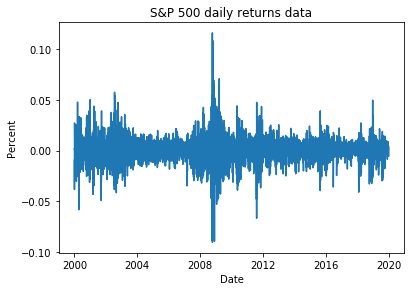

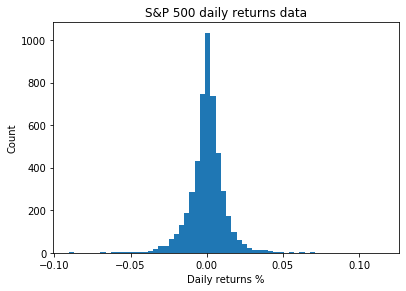

In [4]:
# Download the data of S&P 500 from yahoo finance
SP500_df = web.get_data_yahoo("^GSPC",start = "2000-01-01",end = "2019-12-31")
SP500_df_2020 = web.get_data_yahoo("^GSPC",start = "2020-01-01",end = "2020-06-01")

print(SP500_df.head())
print(SP500_df.info())

## Choose adjust close price

SP500_Close = SP500_df['Close']
SP500_2020_Close = SP500_df_2020['Close']

# Calculating the daily returns for individual stock
SP500_returns = SP500_Close.pct_change()

print(SP500_returns.head())

# Charting the daily return for Netflix
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(SP500_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("S&P 500 daily returns data")
plt.show()

# histogram
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
SP500_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Count")
ax1.set_title("S&P 500 daily returns data")
plt.show()


                 High        Low       Open      Close  Volume  Adj Close
Date                                                                     
1999-12-31  25.200001  24.450001  25.030001  24.639999       0  24.639999
2000-01-03  26.150000  23.980000  24.360001  24.209999       0  24.209999
2000-01-04  27.180000  24.799999  24.940001  27.010000       0  27.010000
2000-01-05  29.000000  25.850000  27.980000  26.410000       0  26.410000
2000-01-06  26.709999  24.700001  26.680000  25.730000       0  25.730000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 1999-12-31 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5032 non-null   float64
 1   Low        5032 non-null   float64
 2   Open       5032 non-null   float64
 3   Close      5032 non-null   float64
 4   Volume     5032 non-null   int64  
 5   Adj Close  5032 non-null   float64
dtypes: float64(5), int64(1)
memory us

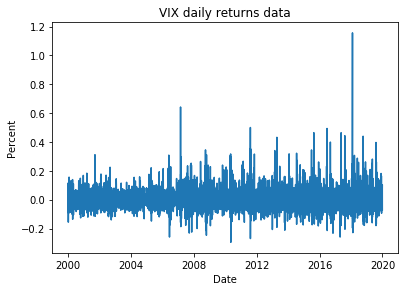

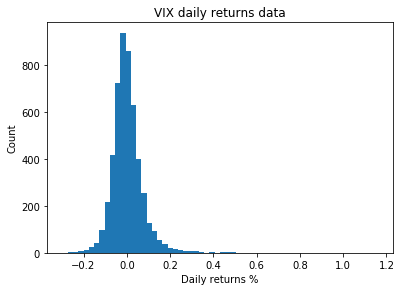

In [5]:
# Download the data of VIX from yahoo finance
VIX_df = web.get_data_yahoo("^VIX",start = "2000-01-01",end = "2019-12-31")
VIX_df_2020 = web.get_data_yahoo("^VIX",start = "2020-01-01",end = "2020-06-01")

VIX_Close = VIX_df['Close']
VIX_2020_Close = VIX_df_2020['Close']

print(VIX_df.head())
print(VIX_df.info())

# Calculating the daily returns for individual stock
VIX_returns = VIX_Close.pct_change()

print(VIX_returns.head())

# Charting the daily return for Netflix
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(VIX_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("VIX daily returns data")
plt.show()

# histogram
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
VIX_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Count")
ax1.set_title("VIX daily returns data")
plt.show()


## Data scaling

In [6]:
# Minmax
from sklearn.preprocessing import MinMaxScaler

SP500_scaler = MinMaxScaler()
SP500_Close = SP500_scaler.fit_transform(np.asarray(SP500_Close).reshape(-1, 1))

SP500_2020_scaler = MinMaxScaler()
SP500_2020_Close = SP500_2020_scaler.fit_transform(np.asarray(SP500_2020_Close).reshape(-1, 1))

VIX_scaler = MinMaxScaler()
VIX_Close = VIX_scaler.fit_transform(np.asarray(VIX_Close).reshape(-1, 1))

VIX_2020_scaler = MinMaxScaler()
VIX_2020_Close = VIX_2020_scaler.fit_transform(np.asarray(VIX_2020_Close).reshape(-1, 1))

In [7]:
# Standardization

In [8]:
# Normalizatio 

# Univariate LSTM Models

Predict S&P 500 by past S&P 500 data.

In [9]:
# We are working with a univariate series, so the number of features is one, for one variable.
n_features = 1

## Data Preparation

In [10]:
# univariate data preparation
from numpy import array

In [11]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [12]:
# split into samples
X_train, y_train = split_sequence(SP500_Close, n_steps)
X_test, y_test = split_sequence(SP500_2020_Close, n_steps)

'''
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])
'''

'\n# summarize the data\nfor i in range(len(X)):\n    print(X[i], y[i])\n'

In [13]:
print(X_train.shape)
print(X_test.shape)

(5029, 3, 1)
(102, 3, 1)


## Vanilla LSTM

A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 5029 samples, validate on 102 samples
Epoch 1/200
5029/5029 [==============================] - 1s 220us/step - loss: 0.0465 - val_loss: 0.0063
Epoch 2/200
5029/5029 [==============================] - 1s 122us/step - loss: 9.4195e-05 - val_loss: 0.0061
Epoch 3/200
5029/5029 [==============================] - 1s 122us/step - loss: 6.6864e-05 - val_loss: 0.0061
Epoch 4/200
5029/5029 [==============================] - 1s 120us/step - loss: 6.4857e-05 - val_loss: 0.0061
Epoch 5/200
5029/5029 [==============================] - 1s 120us/step - loss: 6.4728e-05 - val_loss: 0.0060
Epoch 6/200
5029/5029 [==============================] - 1s 124us/step - loss: 6.4800e-05 - val_loss: 0.0061
Epoch 7/200
5029/5029 [==============================] - 1s 123us/step - loss: 6.5102e-05 - val_loss: 0.0060
Epoch 8/200
5029/5029 [==============================] - 1s 125us/step - loss: 6.4438e-05 - val_loss: 0.0060
Epo

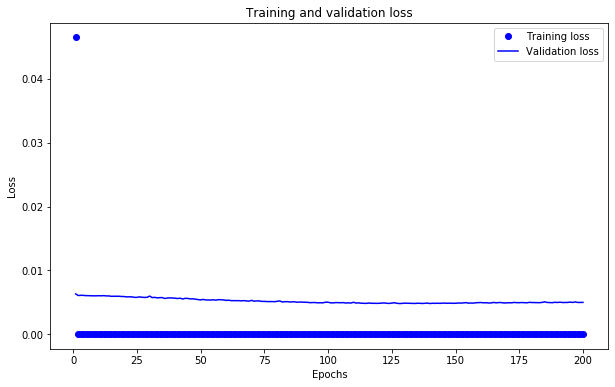

In [14]:
# define model
model_1 = Sequential()
model_1.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')

# fit model
history = model_1.fit(X_train, y_train, epochs=200, validation_data = (X_test, y_test) ,verbose=1)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction of S&P 2020

mse on testing set:
0.004989502056321788
R^2 on testing set:
0.9261663619244673


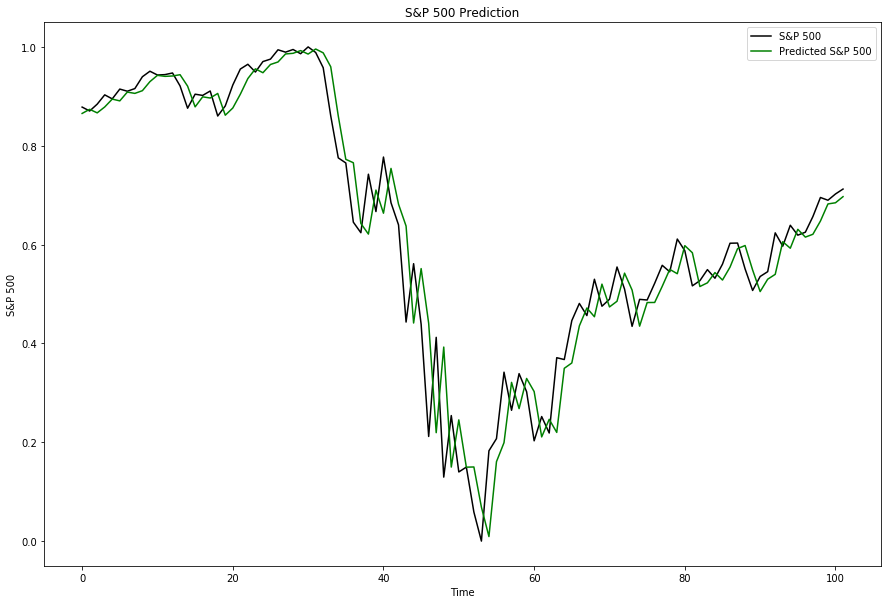

In [15]:
# Prediction of S&P 2020
preds_y_test = model_1.predict(X_test, verbose=0)

# Calculate mse on testing set
from sklearn.metrics import mean_squared_error
print("mse on testing set:")
print(mean_squared_error(y_test, preds_y_test))

# Calculate R^2 on testing set
from sklearn.metrics import r2_score
print("R^2 on testing set:")
print(r2_score(y_test, preds_y_test))

# Visualize prediction
plt.figure(figsize=(15,10))
plt.plot(y_test, color = 'black', label = 'S&P 500')
plt.plot(preds_y_test, color = 'green', label = 'Predicted S&P 500')
plt.title('S&P 500 Prediction')
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend()
plt.show()

## Stacked LSTM

Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

Train on 5029 samples, validate on 102 samples
Epoch 1/200
5029/5029 [==============================] - 2s 397us/step - loss: 0.0319 - val_loss: 0.0075
Epoch 2/200
5029/5029 [==============================] - 1s 209us/step - loss: 9.8613e-05 - val_loss: 0.0070
Epoch 3/200
5029/5029 [==============================] - 1s 210us/step - loss: 8.7691e-05 - val_loss: 0.0070
Epoch 4/200
5029/5029 [==============================] - 1s 206us/step - loss: 8.2561e-05 - val_loss: 0.0070
Epoch 5/200
5029/5029 [==============================] - 1s 213us/step - loss: 8.1494e-05 - val_loss: 0.0070
Epoch 6/200
5029/5029 [==============================] - 1s 212us/step - loss: 8.2464e-05 - val_loss: 0.0071
Epoch 7/200
5029/5029 [==============================] - 1s 219us/step - loss: 7.9802e-05 - val_loss: 0.0068
Epoch 8/200
5029/5029 [==============================] - 1s 213us/step - loss: 8.0734e-05 - val_loss: 0.0070
Epoch 9/200
5029/5029 [==============================] - 1s 217us/step - loss: 8.2216

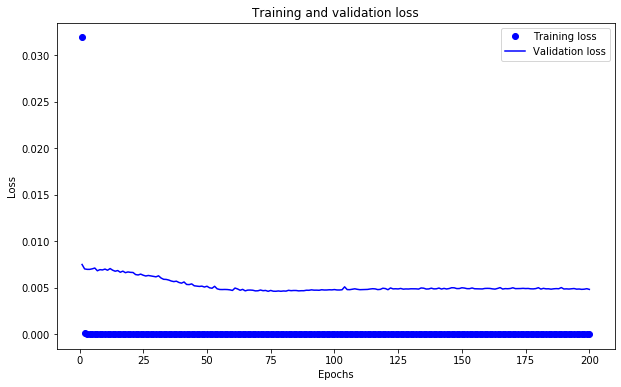

In [16]:
# define model
model_2 = Sequential()
model_2.add(LSTM(50, activation='relu',return_sequences=True ,input_shape=(n_steps, n_features)))
model_2.add(LSTM(50, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')

# fit model
history = model_2.fit(X_train, y_train, epochs=200, validation_data = (X_test, y_test) ,verbose=1)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction of S&P 2020

mse on testing set:
0.004838127536473429
R^2 on testing set:
0.9284063713254416


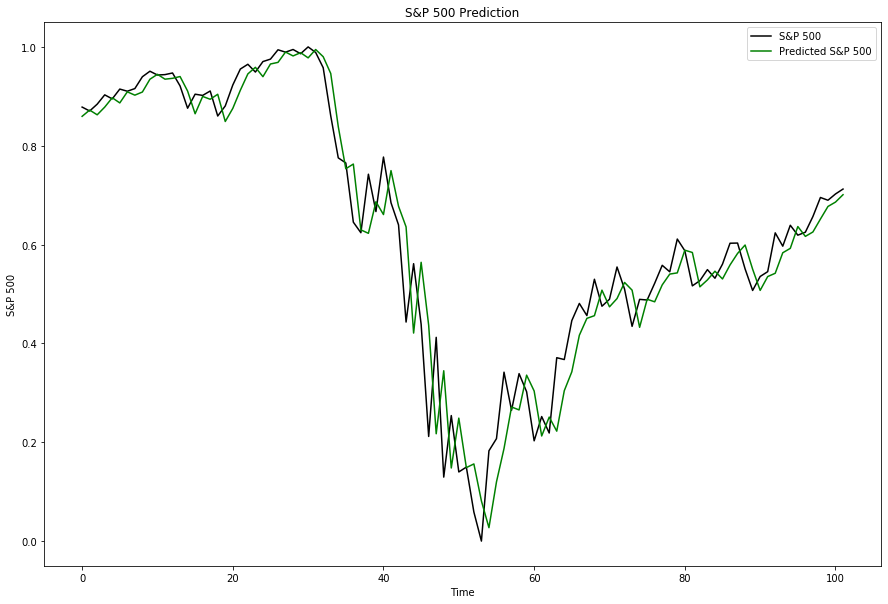

In [17]:
# Prediction of S&P 2020
preds_y_test = model_2.predict(X_test, verbose=0)

# Calculate mse on testing set
from sklearn.metrics import mean_squared_error
print("mse on testing set:")
print(mean_squared_error(y_test, preds_y_test))

# Calculate R^2 on testing set
from sklearn.metrics import r2_score
print("R^2 on testing set:")
print(r2_score(y_test, preds_y_test))

# Visualize prediction
plt.figure(figsize=(15,10))
plt.plot(y_test, color = 'black', label = 'S&P 500')
plt.plot(preds_y_test, color = 'green', label = 'Predicted S&P 500')
plt.title('S&P 500 Prediction')
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend()
plt.show()

# Multivariate LSTM Models

Predict S&P 500 by past S&P 500 data and VIX.

In [18]:
# We are working with a Multivariate series, so the number of features is 2, for 2 variable.
n_features = 2

In [19]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [20]:
# define input sequence
in_seq1_train = SP500_Close.copy()
in_seq2_train = VIX_Close.copy()
out_seq_train = SP500_Close.copy()

in_seq1_test = SP500_2020_Close.copy()
in_seq2_test = VIX_2020_Close.copy()
out_seq_test = SP500_2020_Close.copy()

In [21]:
# convert to [rows, columns] structure
in_seq1_train = in_seq1_train.reshape((len(in_seq1_train), 1))
in_seq2_train = in_seq2_train.reshape((len(in_seq2_train), 1))
out_seq_train = out_seq_train.reshape((len(out_seq_train), 1))

in_seq1_test = in_seq1_test.reshape((len(in_seq1_test), 1))
in_seq2_test = in_seq2_test.reshape((len(in_seq2_test), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))


# horizontally stack columns
dataset_train = hstack((in_seq1_train, in_seq2_train, out_seq_train))
dataset_test = hstack((in_seq1_test, in_seq2_test, out_seq_test))

# convert into input/output
X_train, y_train = split_sequences(dataset_train, n_steps)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(dataset_test, n_steps)
print(X_test.shape, y_test.shape)

# summarize the data
for i in range(5):
    print(X_train[i], y_train[i])

(5029, 3, 2) (5029,)
(102, 3, 2) (102,)
[[0.30923467 0.21611822]
 [0.30376165 0.21012268]
 [0.28199448 0.24916341]] 0.28304380310388855
[[0.30376165 0.21012268]
 [0.28199448 0.24916341]
 [0.2830438  0.24079754]] 0.28356651465159
[[0.28199448 0.24916341]
 [0.2830438  0.24079754]
 [0.28356651 0.23131622]] 0.29839786553499004
[[0.2830438  0.24079754]
 [0.28356651 0.23131622]
 [0.29839787 0.17540434]] 0.30469007067105847
[[0.28356651 0.23131622]
 [0.29839787 0.17540434]
 [0.30469007 0.1752649 ]] 0.29726272862380243


# Vanilla LSTM

Train on 5029 samples, validate on 102 samples
Epoch 1/200
5029/5029 [==============================] - 1s 280us/step - loss: 0.0244 - val_loss: 0.0072
Epoch 2/200
5029/5029 [==============================] - 1s 126us/step - loss: 1.2421e-04 - val_loss: 0.0063
Epoch 3/200
5029/5029 [==============================] - 1s 127us/step - loss: 9.0758e-05 - val_loss: 0.0062
Epoch 4/200
5029/5029 [==============================] - 1s 141us/step - loss: 8.2649e-05 - val_loss: 0.0061
Epoch 5/200
5029/5029 [==============================] - 1s 133us/step - loss: 8.2960e-05 - val_loss: 0.0060
Epoch 6/200
5029/5029 [==============================] - 1s 123us/step - loss: 7.3113e-05 - val_loss: 0.0060
Epoch 7/200
5029/5029 [==============================] - 1s 130us/step - loss: 6.9528e-05 - val_loss: 0.0058
Epoch 8/200
5029/5029 [==============================] - 1s 129us/step - loss: 6.8029e-05 - val_loss: 0.0058
Epoch 9/200
5029/5029 [==============================] - 1s 125us/step - loss: 6.4395

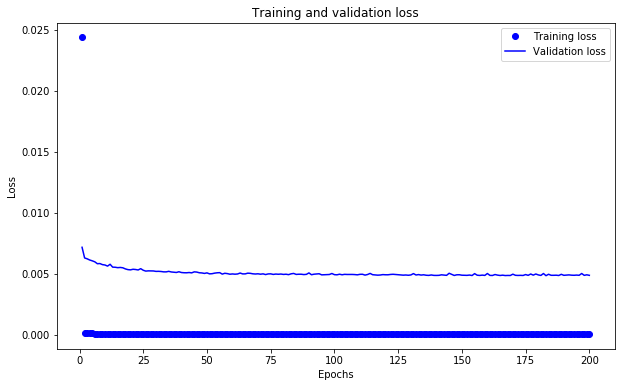

In [22]:
# define model
model_3= Sequential()
model_3.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model_3.add(Dense(1))
model_3.compile(optimizer='adam', loss='mse')

# fit model
history = model_3.fit(X_train, y_train, epochs=200, validation_data = (X_test, y_test) ,verbose=1)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction of S&P 2020

mse on testing set:
0.00485360543286988
R^2 on testing set:
0.9281773325580844


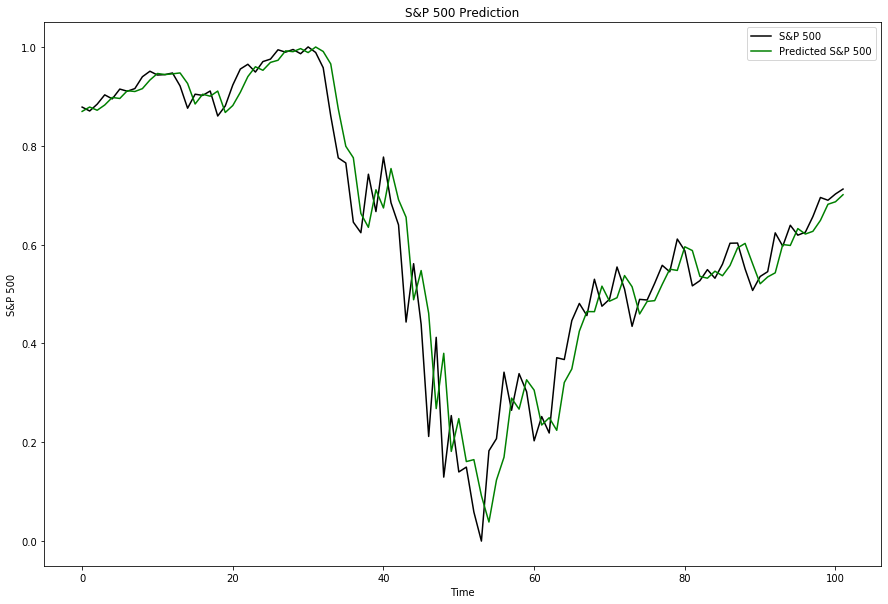

In [23]:
# Prediction of S&P 2020
preds_y_test = model_3.predict(X_test, verbose=0)

# Calculate mse on testing set
from sklearn.metrics import mean_squared_error
print("mse on testing set:")
print(mean_squared_error(y_test, preds_y_test))

# Calculate R^2 on testing set
from sklearn.metrics import r2_score
print("R^2 on testing set:")
print(r2_score(y_test, preds_y_test))

# Visualize prediction
plt.figure(figsize=(15,10))
plt.plot(y_test, color = 'black', label = 'S&P 500')
plt.plot(preds_y_test, color = 'green', label = 'Predicted S&P 500')
plt.title('S&P 500 Prediction')
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend()
plt.show()

## Stacked LSTM

Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

Train on 5029 samples, validate on 102 samples
Epoch 1/200
5029/5029 [==============================] - 2s 427us/step - loss: 0.0370 - val_loss: 0.0095
Epoch 2/200
5029/5029 [==============================] - 1s 194us/step - loss: 1.9956e-04 - val_loss: 0.0073
Epoch 3/200
5029/5029 [==============================] - 1s 193us/step - loss: 1.1052e-04 - val_loss: 0.0074
Epoch 4/200
5029/5029 [==============================] - 1s 193us/step - loss: 9.5466e-05 - val_loss: 0.0071
Epoch 5/200
5029/5029 [==============================] - 1s 192us/step - loss: 8.4529e-05 - val_loss: 0.0070
Epoch 6/200
5029/5029 [==============================] - 1s 192us/step - loss: 8.6512e-05 - val_loss: 0.0070
Epoch 7/200
5029/5029 [==============================] - 1s 190us/step - loss: 8.0072e-05 - val_loss: 0.0068
Epoch 8/200
5029/5029 [==============================] - 1s 192us/step - loss: 8.1990e-05 - val_loss: 0.0067
Epoch 9/200
5029/5029 [==============================] - 1s 195us/step - loss: 7.5773

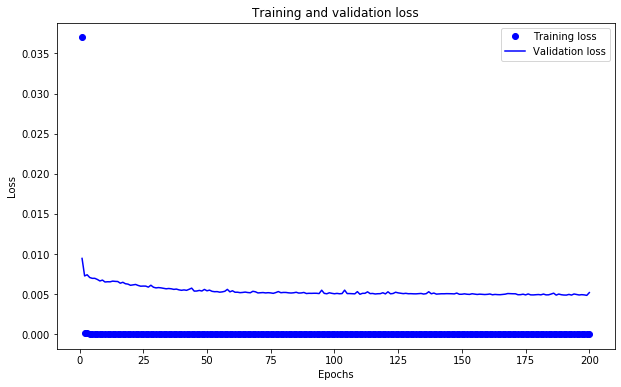

In [24]:
# define model
model_4 = Sequential()
model_4.add(LSTM(50, activation='relu',return_sequences=True ,input_shape=(n_steps, n_features)))
model_4.add(LSTM(50, activation='relu'))
model_4.add(Dense(1))
model_4.compile(optimizer='adam', loss='mse')

# fit model
history = model_4.fit(X_train, y_train, epochs=200, validation_data = (X_test, y_test) ,verbose=1)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction of S&P 2020

mse on testing set:
0.005200844299332676
R^2 on testing set:
0.9230389623354109


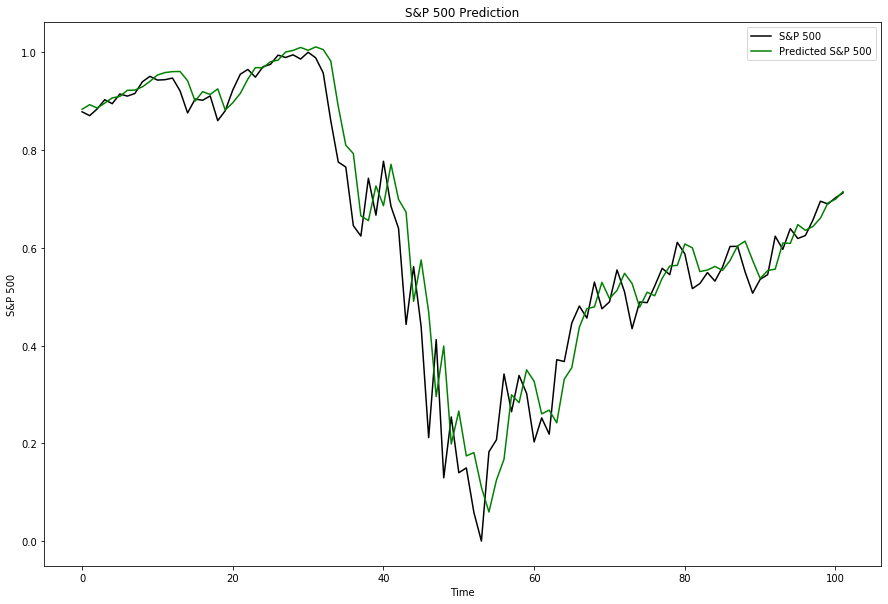

In [25]:
# Prediction of S&P 2020
preds_y_test = model_4.predict(X_test, verbose=0)

# Calculate mse on testing set
from sklearn.metrics import mean_squared_error
print("mse on testing set:")
print(mean_squared_error(y_test, preds_y_test))

# Calculate R^2 on testing set
from sklearn.metrics import r2_score
print("R^2 on testing set:")
print(r2_score(y_test, preds_y_test))

# Visualize prediction
plt.figure(figsize=(15,10))
plt.plot(y_test, color = 'black', label = 'S&P 500')
plt.plot(preds_y_test, color = 'green', label = 'Predicted S&P 500')
plt.title('S&P 500 Prediction')
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend()
plt.show()